In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

In [2]:
BMBR_path="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/"
BMBR_path_shifts="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data_chemical_shift/"

In [14]:
for root, dirs, files in os.walk(BMBR_path_shifts):
    for dire in dirs:
        if not os.path.isdir(BMBR_path+dire):
            print(dire)
            os.system("rm -r "+BMBR_path_shifts+dire)

In [6]:
os.path.isdir(BMBR_path+"bmr19127")

True

In [3]:
chemical_shifts={
    "H":{
"ALA":8.11,
"ARG":8.17,
"ASN":8.33,
"ASP":8.39,
"CYS":7.81,
"CYS2":8.53,
"GLN":8.25,
"GLU":8.29,
"GLY":8.34,
"HIS":8.09,
"ILE":7.94,
"LEU":8.12,
"LYS":8.13,
"MET":8.37,
"PHE":7.95,
"PRO":None,
"SER":8.26,
"THR":8.22,
"TRP":7.59,
"TYR":7.9,
"VAL":7.88
},
"HA":
{
"ALA":4.25,
"ARG":4.33,
"ASN":4.60,
"ASP":4.64,
"CYS":4.63,
"CYS2":4.44,
"GLN":4.26,
"GLU":4.28,
"GLY":3.95,
"HIS":4.50,
"ILE":4.13,
"LEU":4.35,
"LYS":4.28,
"MET":4.55,
"PHE":4.62,
"PRO":4.41,
"SER":4.48,
"THR":4.33,
"TRP":4.54,
"TYR":4.55,
"VAL":4.14
},
"N":
{
"ALA":132.52,
"ARG":120.59,
"ASN":118.48,
"ASP":120.69,
"CYS":117.01,
"CYS2":118.62,
"GLN":119.73,
"GLU":120.87,
"GLY":109.94,
"HIS":118.87,
"ILE":121.07,
"LEU":121.53,
"LYS":121.44,
"MET":120.19,
"PHE":119.41,
"PRO":None,
"SER":115.94,
"THR":114.41,
"TRP":120.57,
"TYR":120.05,
"VAL":119.66
},  
"C":
{
"ALA":177.39,
"ARG":175.91,
"ASN":174.98,
"ASP":176.01,
"CYS":174.77,
"CYS2":175.85,
"GLN":175.88,
"GLU":176.11,
"GLY":174.30,
"HIS":174.88,
"ILE":175.46,
"LEU":176.61,
"LYS":176.15 ,
"MET":175.93,
"PHE":175.28,
"PRO":176.91,
"SER":174.33,
"THR":174.62,
"TRP":175.91,
"TYR":175.32,
"VAL":175.76
},

"CA":
{
"ALA":52.67,
"ARG":55.96,
"ASN":52.94,
"ASP":54.09,
"CYS":58.8,
"CYS2":57.68,
"GLN":55.94,
"GLU":56.39,
"GLY":45.34,
"HIS":55.78,
"ILE":60.64,
"LEU":54.85,
"LYS":56.40 ,
"MET":55.12,
"PHE":56.94,
"PRO":63.53,
"SER":58.35,
"THR":61.59,
"TRP":57.62,
"TYR":57.72,
"VAL":61.80
},

"CB":
{
"ALA":19.03,
"ARG":30.53,
"ASN":38.22,
"ASP":40.76,
"CYS":29.75,
"CYS2":38.38,
"GLN":28.67,
"GLU":30.02,
"GLY":None,
"HIS":29.62,
"ILE":38.26,
"LEU":41.87,
"LYS":32.57 ,
"MET":32.93,
"PHE":39.43,
"PRO":31.87,
"SER":63.88,
"THR":69.75,
"TRP":29.27,
"TYR":38.71,
"VAL":32.68
}
  
    
}



In [4]:
experiments=BMBR.load_BMBR(BMBR_path)

4697 .


In [10]:
ID="4267"

shifts={"H":1,"HA":1,"N":1/5,"C":1/2,"CA":1/2,"CB":1/2}
def get_indexes(experiments:dict, ID:str,shifts:dict):
    index={}
    #shifts=["H","HA","N","C"]
    ["C","CA","CB","N"]
    for shift in shifts:
        index[shift]=[]
    for i,res in enumerate(experiments[ID]["shifts"]["AA_shift"]):
        #print(res)
        for shift in shifts:
            if experiments[ID]["shifts"][shift][i]!=None and res in chemical_shifts[shift] and chemical_shifts[shift][res]!=None:
                #print(shift,res)
                index[shift].append((experiments[ID]["shifts"][shift][i]-chemical_shifts[shift][res])*shifts[shift])
            else:
                index[shift].append(None)
    return index

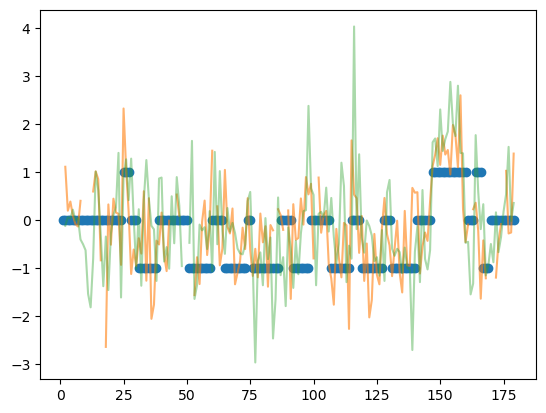

In [23]:
ID="4267"
with open("../04_predict_2str_PSSpred/try/bmr"+ID+"/seq.dat.ss","r") as f:
    for line in f:
        if len(line.split())==6:
            if line.split()[2]=="C":
                plt.plot(int(line.split()[0]),0,"o",c="C0")
            elif line.split()[2]=="E":
                plt.plot(int(line.split()[0]),-1,"o",c="C0")
            elif line.split()[2]=="H":
                plt.plot(int(line.split()[0]),1,"o",c="C0")
                
shifts={"H":1,"HA":1,"N":1/5,"C":1/2,"CA":1/2,"CB":1/2}
index=get_indexes(experiments,ID,shifts)

plt.plot(experiments[ID]["shifts"]["atomID_shift"],np.array(index["C"]),c="C1",label="C",alpha=0.6)
plt.plot(experiments[ID]["shifts"]["atomID_shift"],np.array(index["CA"]),c="C2",label="Ca",alpha=0.4)

In [16]:
index

{'H': [None,
  None,
  0.1899999999999995,
  0.25,
  0.16000000000000014,
  0.0,
  -0.07000000000000028,
  -0.05999999999999872,
  0.9099999999999993,
  None,
  0.39000000000000057,
  None,
  None,
  0.40000000000000036,
  -0.3899999999999997,
  -0.5300000000000011,
  -0.47999999999999954,
  None,
  -0.7199999999999989,
  0.2699999999999996,
  0.6899999999999995,
  0.9000000000000004,
  0.04999999999999982,
  -0.6900000000000004,
  0.3099999999999987,
  0.8599999999999994,
  -1.2199999999999998,
  -0.4300000000000006,
  -1.5199999999999996,
  1.2400000000000002,
  0.4499999999999993,
  1.4000000000000004,
  2.049999999999999,
  0.5599999999999996,
  0.5699999999999994,
  -0.08000000000000007,
  1.1600000000000001,
  1.0300000000000011,
  -0.3799999999999999,
  -0.6200000000000001,
  1.3800000000000008,
  -1.1800000000000006,
  -0.15999999999999925,
  0.17999999999999972,
  0.20000000000000107,
  0.049999999999998934,
  0.33999999999999986,
  -0.4800000000000004,
  None,
  0.5,
  0.4600

5549
18864
18772
19189
18617
4689
7432
6092
18389
15364
18230
17783
26779
18192
5996
25034
17226
16904
11076
25750
16360
15014
16218
15655
25035
17308
18260
25511
18359
16482
16907
18191
25077
17306
16845
5548
16480
7088
18461
16737
19160
17513
17266
15065
19117
16426
25636
19066
7219
15793
6838
16307
17947
15650
15066
15852
15728
16306
5520
15795
18257
18092
15930
19335
16034
16918
26823
18380
5858
17010
5720
15975
16639
5505
18971
18758
4697
19256
18361
25390
18231
19153
6494
17246
18424
7035
4267
26723
15097
18545
4364
25389
30065
15521
17857
18422
5746
17080
17981
16876
15541
5762
17881
6495
17046
7190
25523
15481
16033
17282
26788
5991
16217
19993
17018
15562
16483
6758
15064
5550
15067
5687
6060
6881
7056
7414
17983
7208
19188
16917
15451
17865
15437
7288
4870
7036
17047
25852
17041
15486
17013
17982
27129
25525
6332
25519
18477
15703
5272
18773
15408
18087
26724
15766
15578
18306
11080
18423
5995
19356
18388
7205


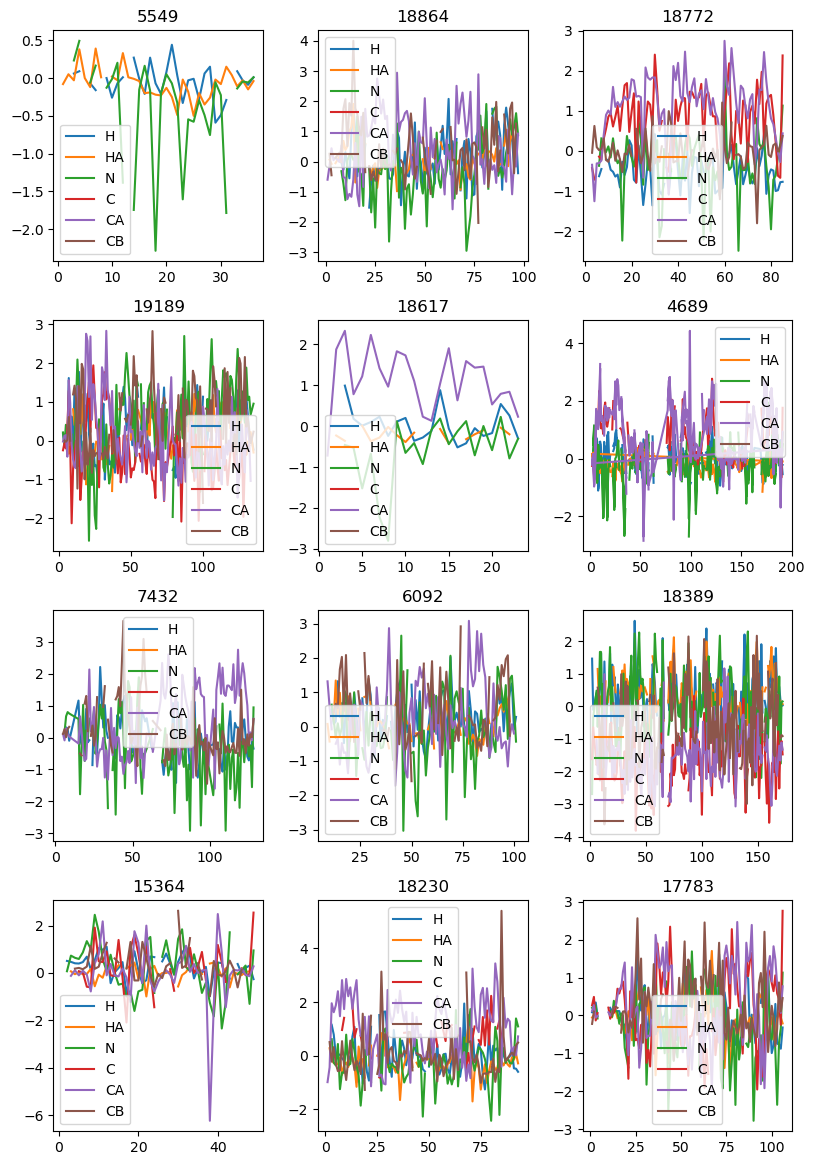

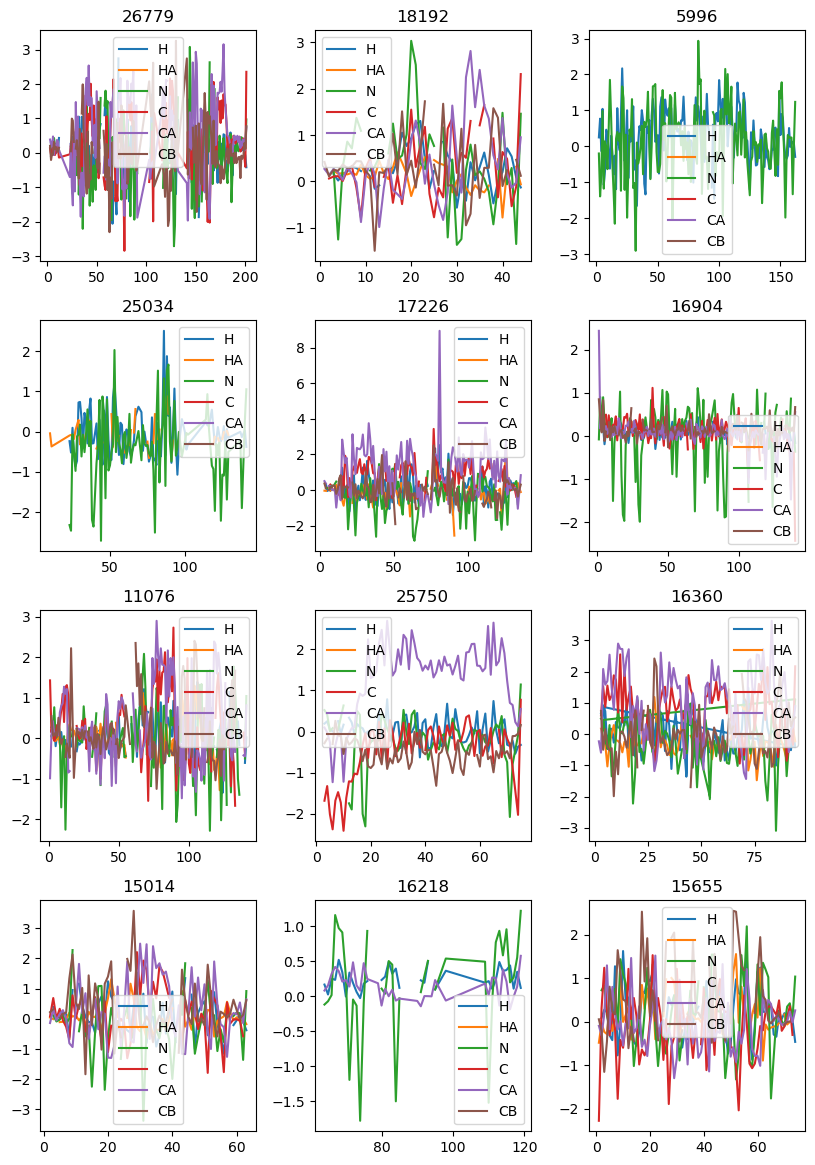

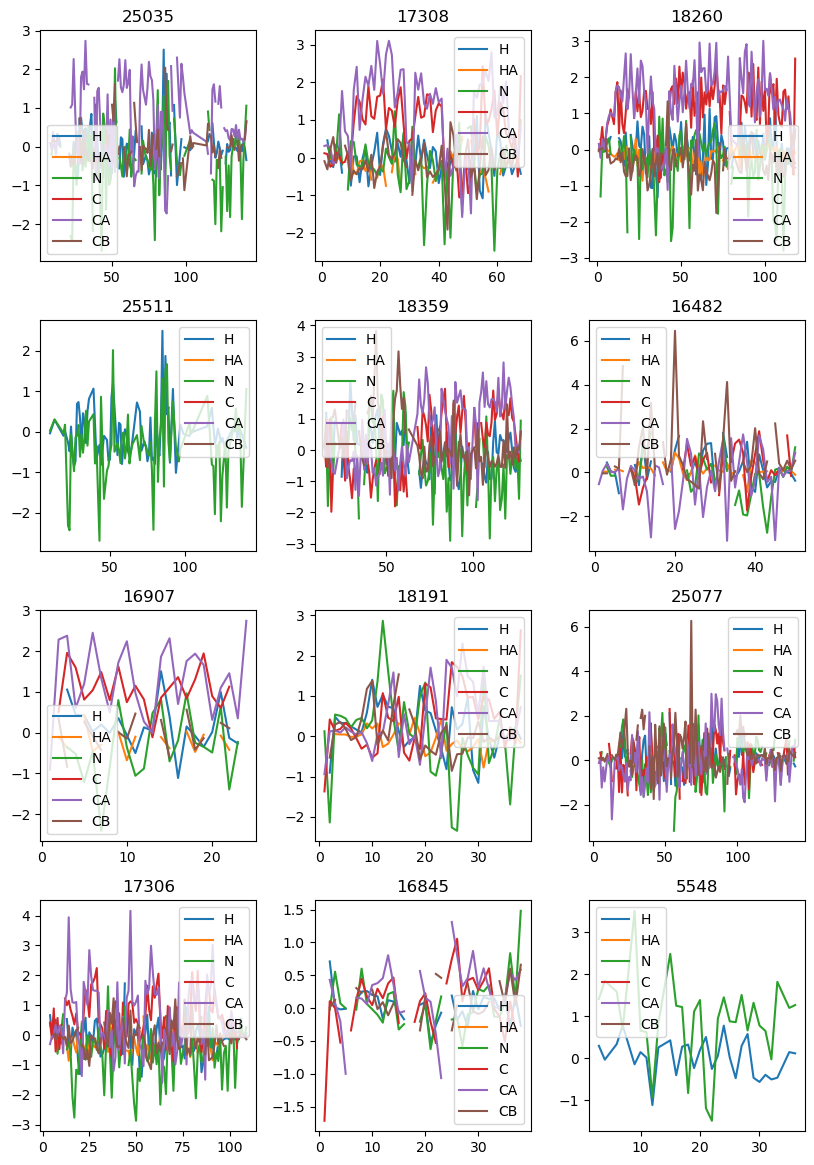

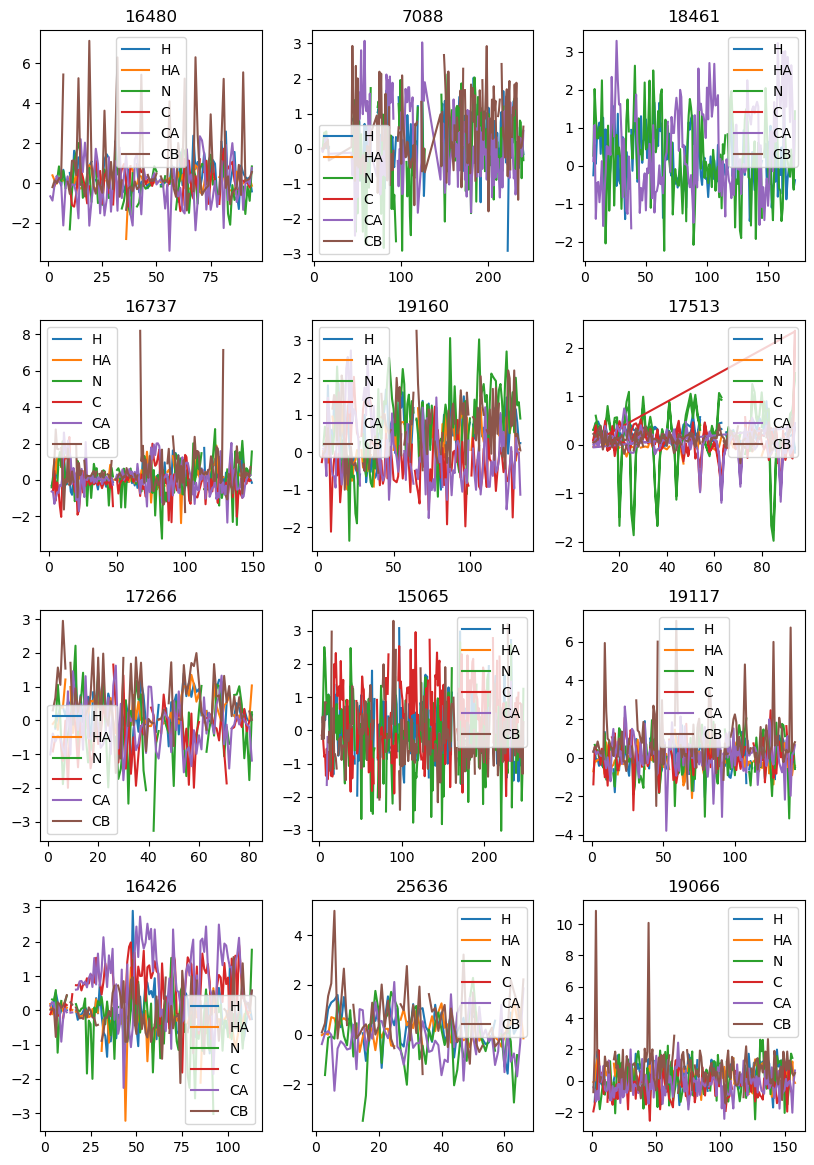

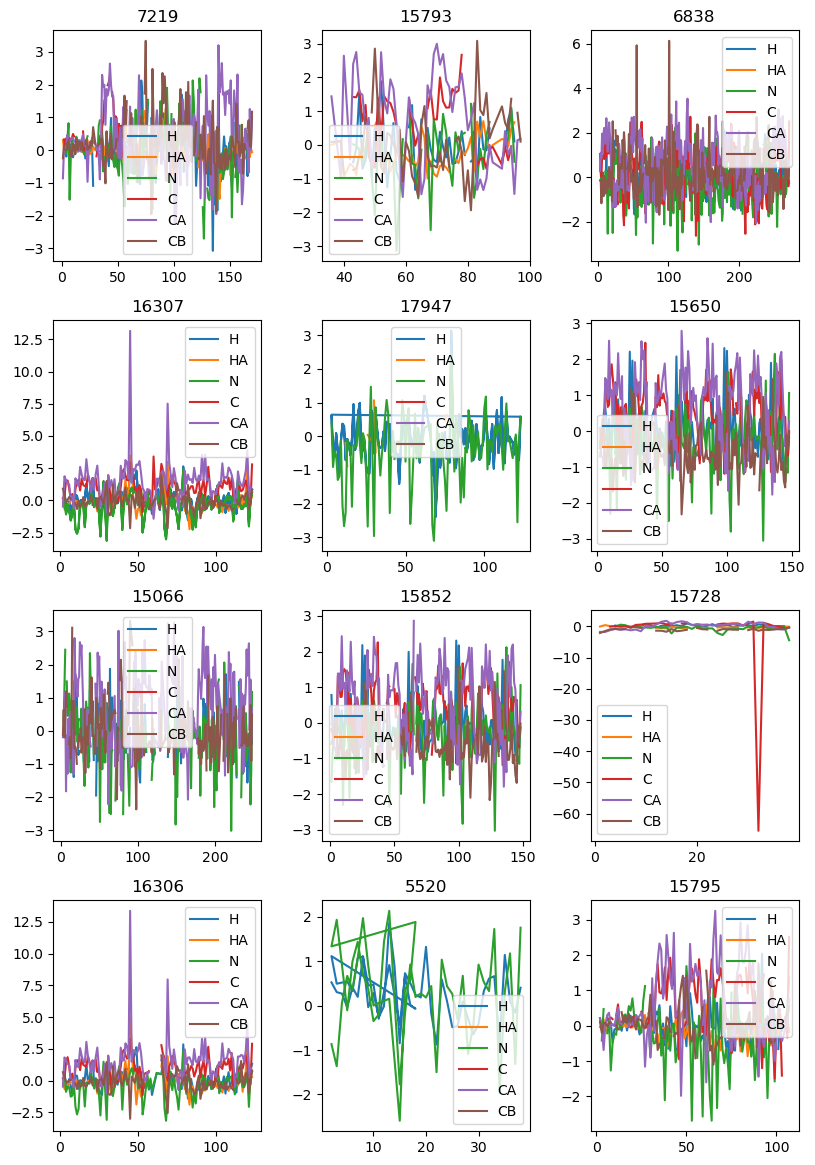

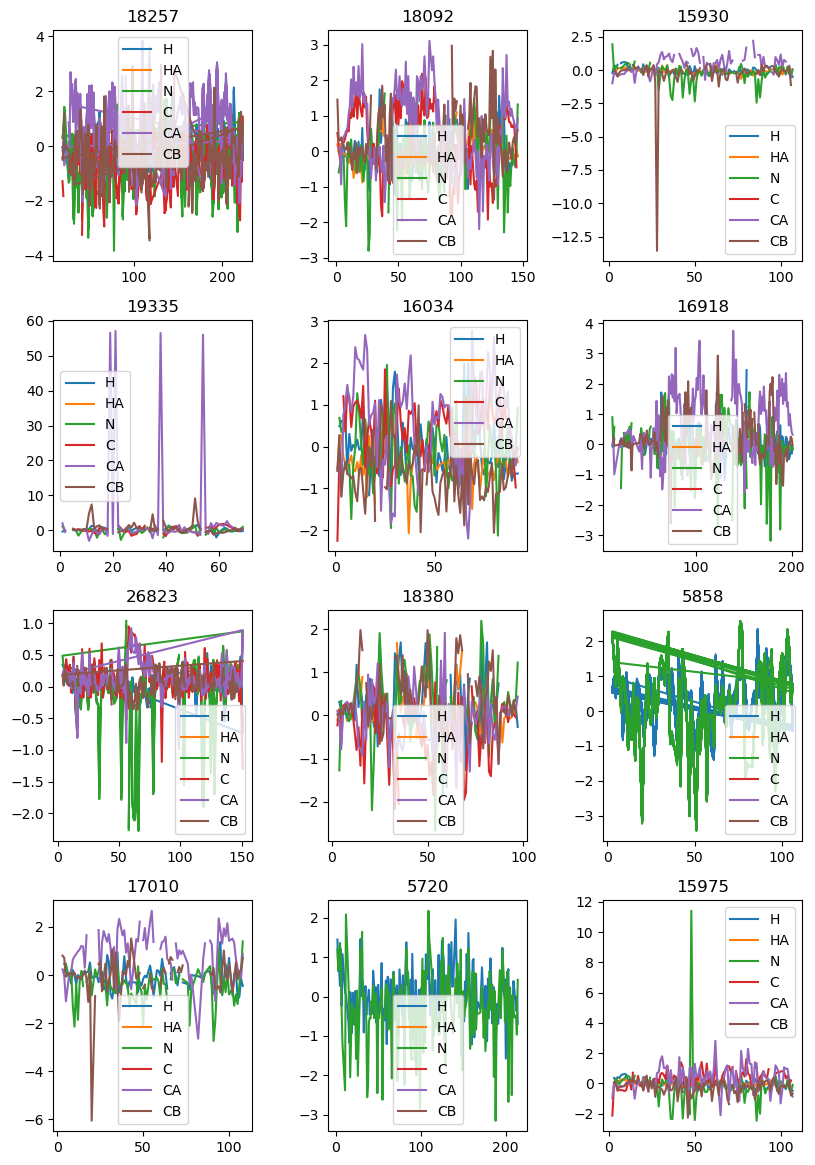

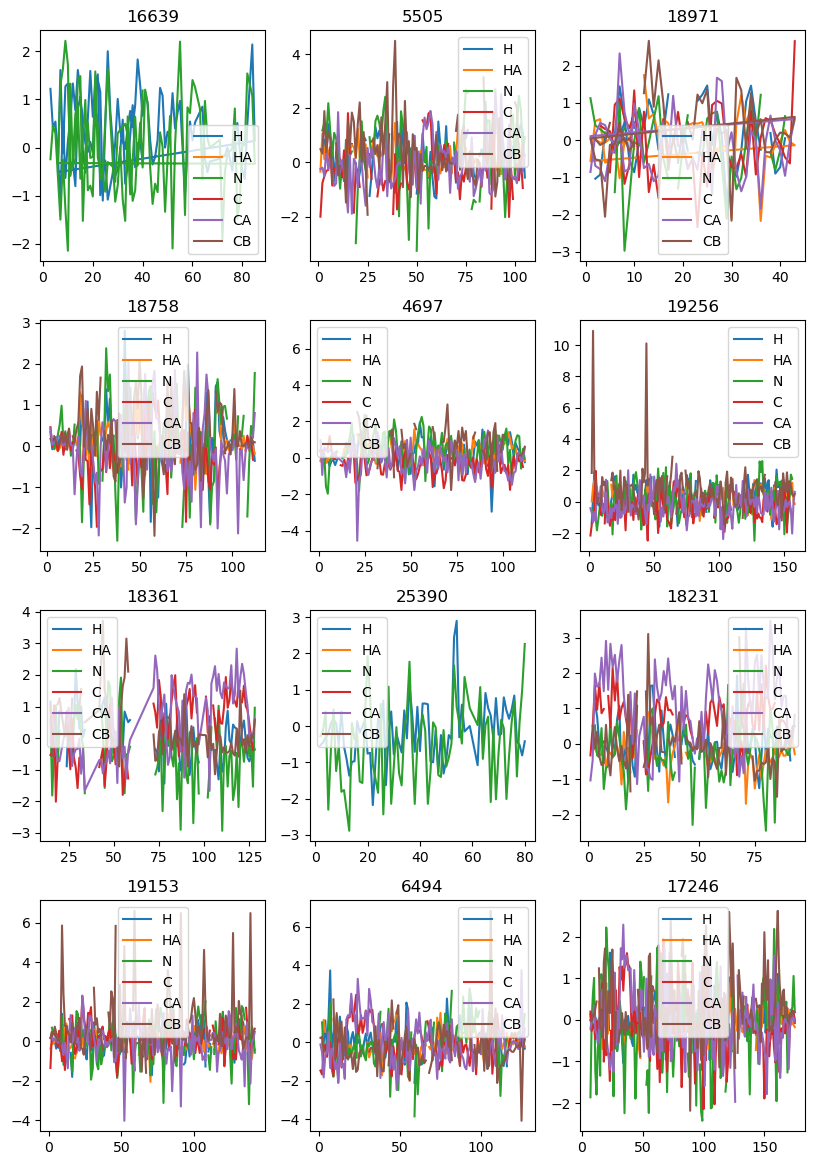

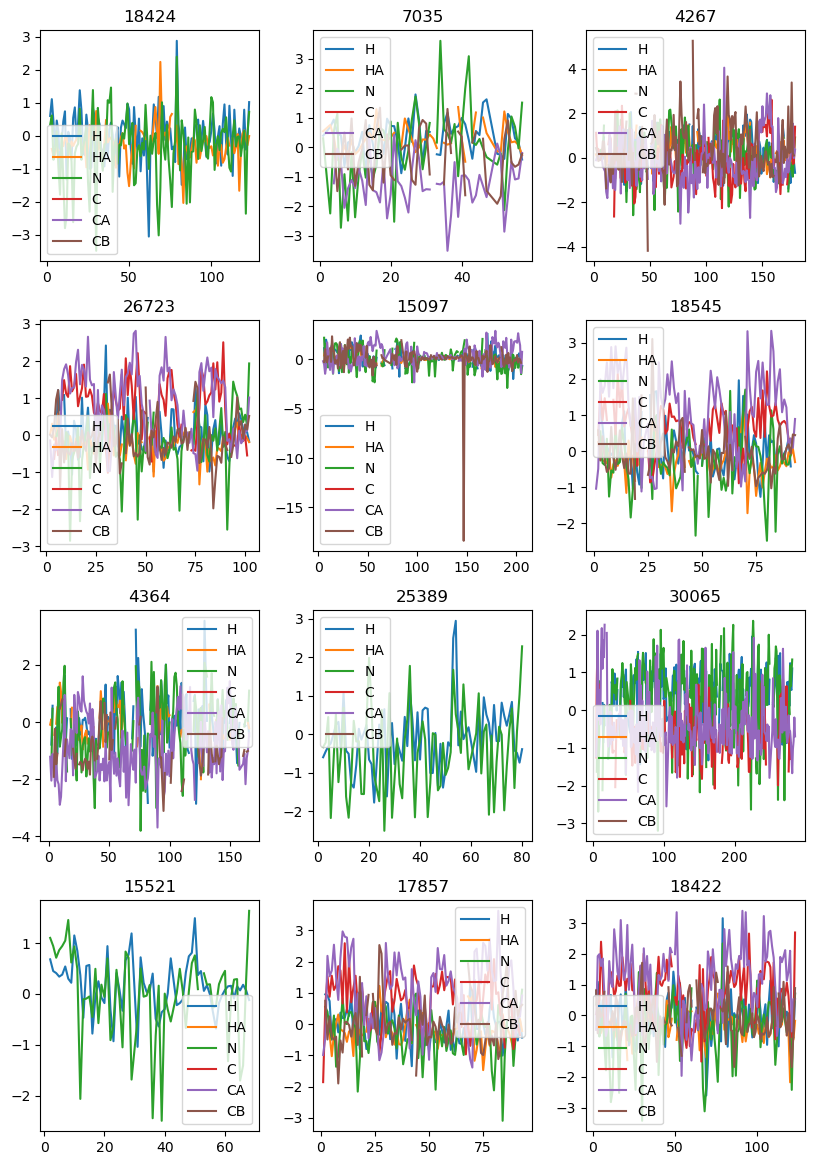

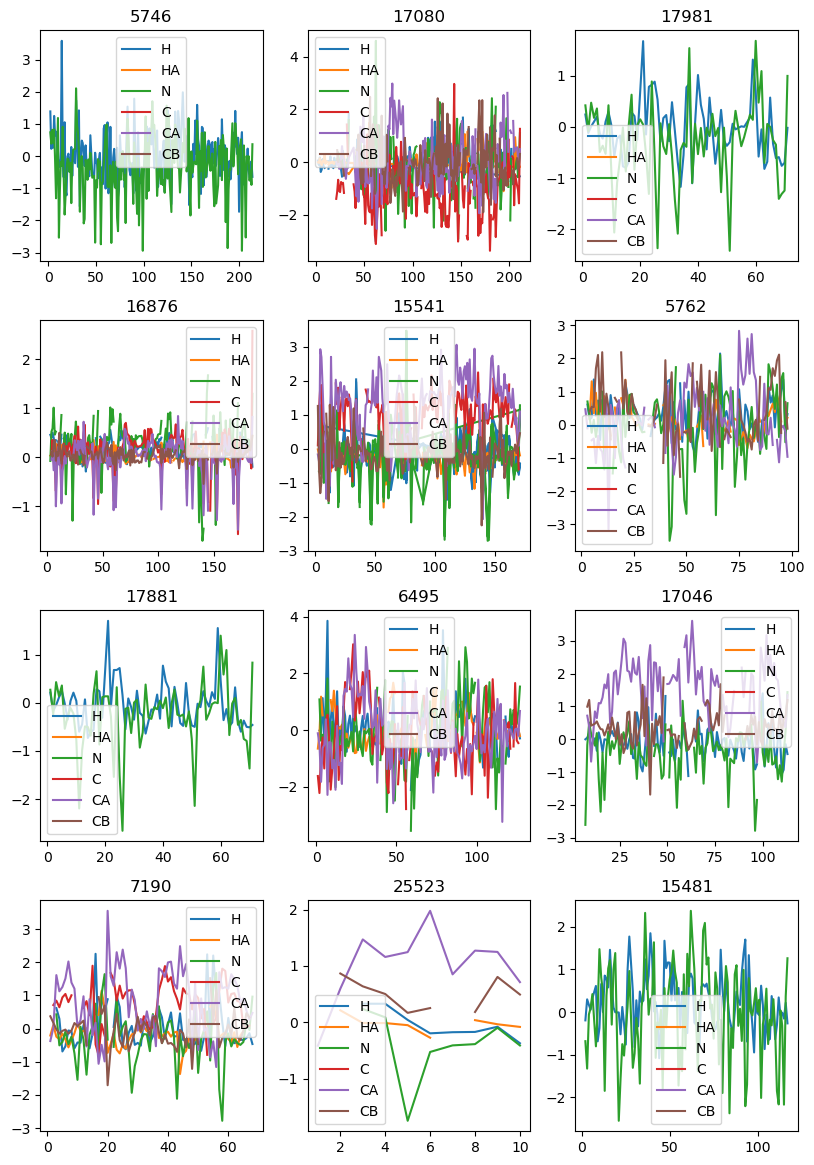

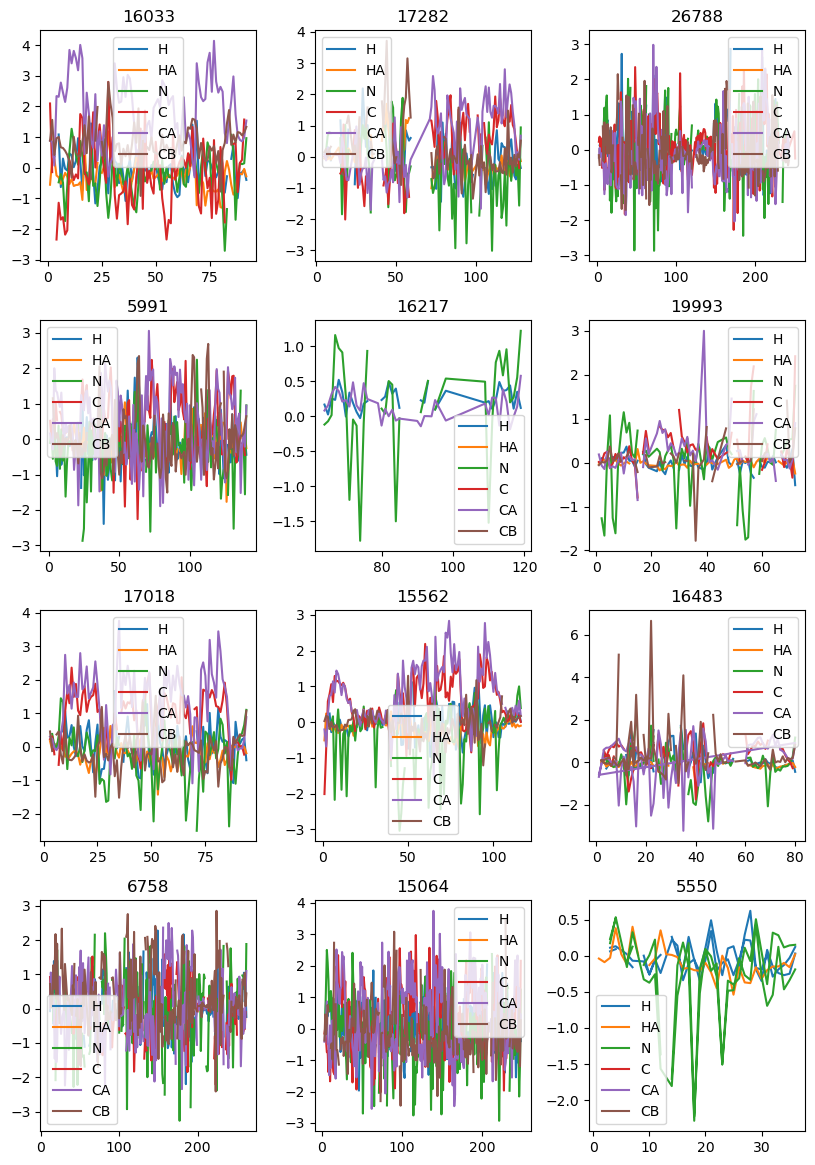

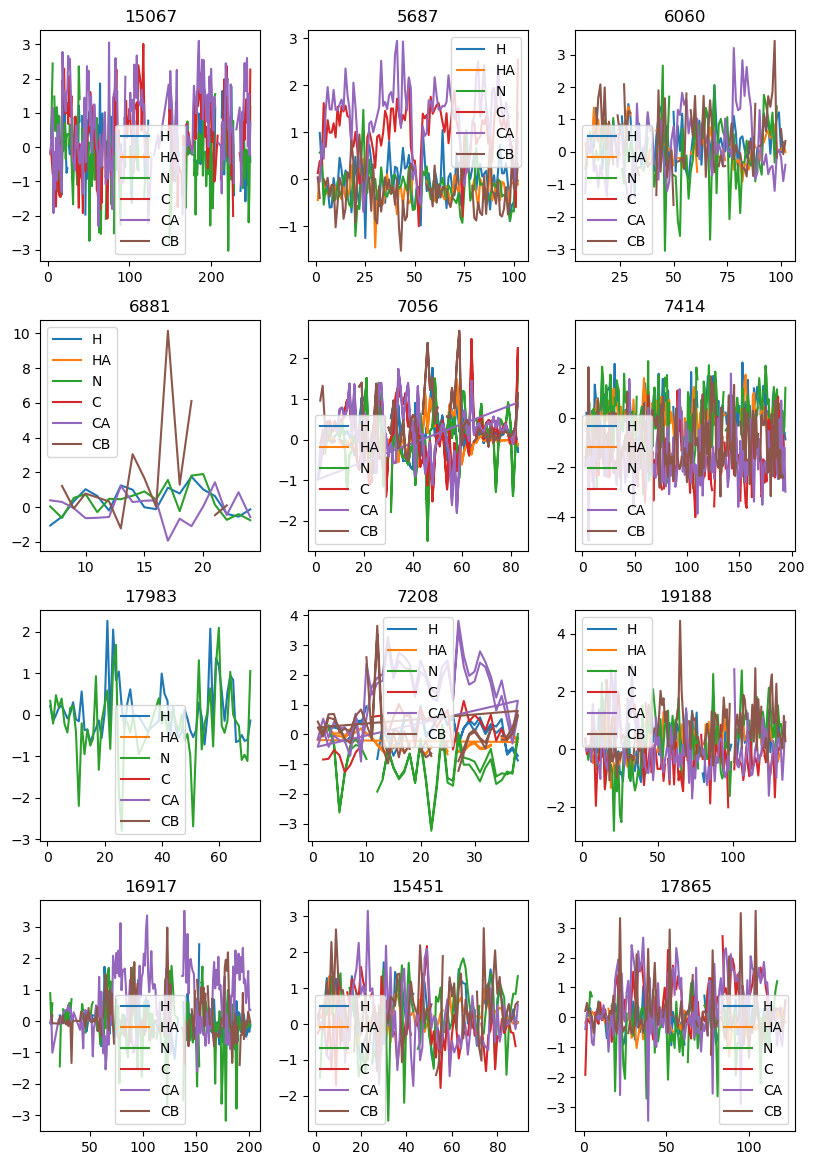

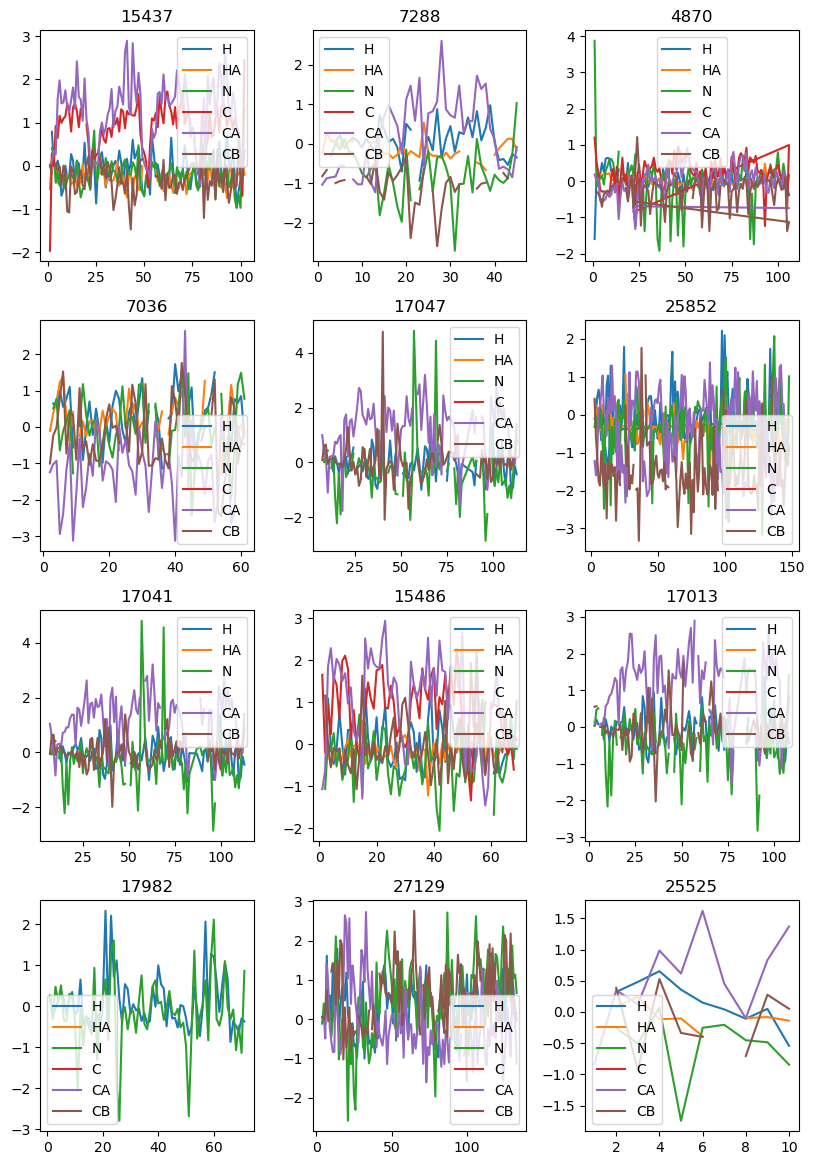

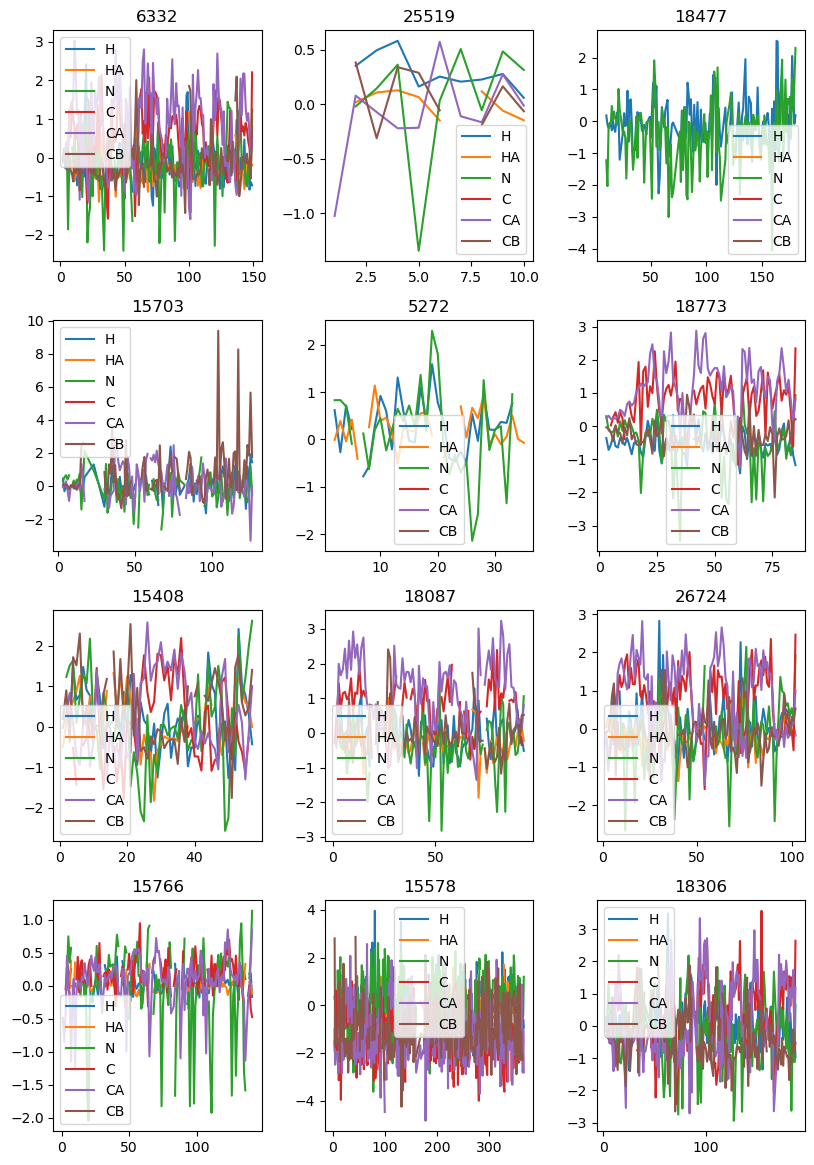

In [57]:
with PdfPages('chemical_shifts.pdf') as pdf:
    plots=0
    
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    i=0
    
    for ID in experiments:
        if len(experiments[ID]["shifts"]["AA_shift"])>0:
            print(ID)
            index=get_indexes(ID,shifts)
            for shift in shifts:
                axs[int(i/3),np.mod(i,3)].plot(experiments[ID]["shifts"]["atomID_shift"],np.array(index[shift]),label=shift)
                #plt.plot(experiments[ID]["shifts"]["atomID_shift"],np.array(index[shift]),label=shift)
            axs[int(i/3),np.mod(i,3)].legend()
            axs[int(i/3),np.mod(i,3)].set_title(ID)
            #plt.show()
            i+=1
        if (i%12==0 and i!=0):
            i=0
            pdf.savefig()  # saves the current figure into a pdf page
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig()         
    plt.close()


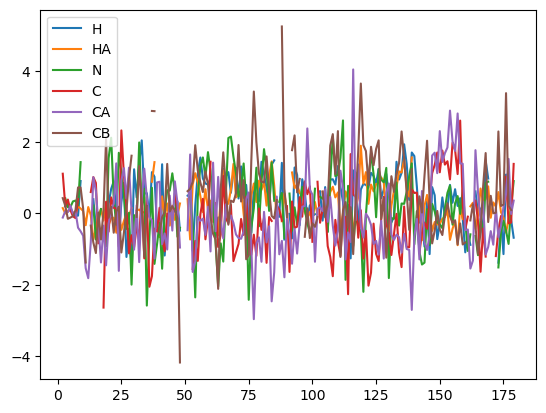

In [41]:
for shift in shifts:
    plt.plot(experiments[ID]["shifts"]["atomID_shift"],np.array(index[shift]),label=shift)
plt.legend()

In [66]:
def load_BMBR(BMBR_path:str):
    # load in experimental data
    experiments={}
    #for root, dirs, files in os.walk(BMBR_path):
    #    if len(files)==1:
    #        file=root+"/"+files[0]
    if 1==1:
        if 1==1:
            file=BMBR_path+"bmr5858/bmr5858_3.str"
    
            with open(file,"r") as f:
                read_relaxations=False
                read_shifts=False
                counter_relaxations=0 # saves data when -1
                counter_shifts=0 # saves data when -1
                for idline,line in enumerate(f):
                    counter_relaxations+=1
                    counter_shifts+=1
                    if "_Entry.ID" in line:
                        ID=line.split()[1]
                        experiments[ID]={}
                        experiments[ID]["disordered"]=False
                        experiments[ID]["micelle"]=False
                        experiments[ID]["shifts"]={}
                        #experiments[ID]["shifts"]["AA_shift"]=[]
                        #experiments[ID]["shifts"]["atomID_shift"]=[]
                        shifts=["H","HA","C","CA","CB","N"]
                        #for shift in shifts:
                        #    experiments[ID]["shifts"][shift]=[]
                    if "_Heteronucl_T2_list.Spectrometer_frequency_1H" in line:
                        field=line.split()[1]
                        try:
                            if float(field)>1100:
                                field=float(field)/1000000
                        except:
                            print(ID,field)


                        experiments[ID][field]={}
                        experiments[ID][field]["results"]={}
                        experiments[ID][field]["results"]["AA"]=[]
                        experiments[ID][field]["results"]["atomID"]=[]
                        experiments[ID][field]["results"]["R2"]=[]

                    if "_Heteronucl_T2_list.T2_val_units" in line:
                        units=line.split()[1]
                        experiments[ID][field]["units"]=units
                    if "_T2.Heteronucl_T2_list_ID" in line:
                        counter_relaxations=-3
                    if counter_relaxations==-1:
                        read_relaxations=True
                    if read_relaxations:
                        if len(line.split())==21:
                            experiments[ID][field]["results"]["AA"].append(line.split()[6])
                            experiments[ID][field]["results"]["atomID"].append(int(line.split()[5]))
                            if experiments[ID][field]["units"]=="s-1" or experiments[ID][field]["units"]=="Hz":
                                try:
                                    experiments[ID][field]["results"]["R2"].append(float(line.split()[10]))
                                except:
                                    experiments[ID][field]["results"]["R2"].append(None)
                            elif experiments[ID][field]["units"]=="s":
                                try:
                                    experiments[ID][field]["results"]["R2"].append(1/float(line.split()[10]))
                                except:
                                    experiments[ID][field]["results"]["R2"].append(None)
                            elif experiments[ID][field]["units"]=="ms":
                                try:
                                    experiments[ID][field]["results"]["R2"].append(1/float(line.split()[10])*1000)
                                except:
                                    experiments[ID][field]["results"]["R2"].append(None)
                            elif experiments[ID][field]["units"]=="ms-1":
                                try:
                                    experiments[ID][field]["results"]["R2"].append(float(line.split()[10])/1000)
                                except:
                                    experiments[ID][field]["results"]["R2"].append(None)

                        else:
                            read_relaxations=False
                    if "_Assigned_chem_shift_list.Sample_condition_list_label" in line:
                        shift_condition=line.split()[1][1:]
                        experiments[ID]["shifts"][shift_condition]={}
                        experiments[ID]["shifts"][shift_condition]["AA_shift"]=[]
                        experiments[ID]["shifts"][shift_condition]["atomID_shift"]=[]
                      
                        for shift in shifts:
                            experiments[ID]["shifts"][shift_condition][shift]=[]
                        
                    if "_Atom_chem_shift.Assigned_chem_shift_list_ID" in line:
                        counter_shifts=-3
                    if counter_shifts==-1:
                        read_shifts=True
                    if read_shifts:

                        if len(line.split())==24:
                            if len(experiments[ID]["shifts"][shift_condition]["atomID_shift"])>0:
                                if int(line.split()[5])==experiments[ID]["shifts"][shift_condition]["atomID_shift"][-1]:
                                    for shift in shifts:
                                        if shift==line.split()[7]:
                                            experiments[ID]["shifts"][shift_condition][shift].append(float(line.split()[10]))
                                else:
                                    experiments[ID]["shifts"][shift_condition]["atomID_shift"].append(int(line.split()[5]))
                                    experiments[ID]["shifts"][shift_condition]["AA_shift"].append(line.split()[6])
                                    for shift in shifts:
                                        #print(f'atomIDs: {len(experiments[ID]["shifts"]["atomID_shift"])}, shift {shift}: {len(experiments[ID]["shifts"][shift])}')
                                        if len(experiments[ID]["shifts"][shift_condition][shift])<len(experiments[ID]["shifts"][shift_condition]["atomID_shift"])-1:
                                            experiments[ID]["shifts"][shift_condition][shift].append(None)

                                        if shift==line.split()[7]:
                                            experiments[ID]["shifts"][shift_condition][shift].append(float(line.split()[10]))



                            else:
                                experiments[ID]["shifts"][shift_condition]["atomID_shift"].append(int(line.split()[5]))
                                experiments[ID]["shifts"][shift_condition]["AA_shift"].append(line.split()[6])
                                for index,shift in enumerate(shifts):
                                    if shift==line.split()[7]:
                                        experiments[ID]["shifts"][shift_condition][shift].append(float(line.split()[10]))
                        else:
                            read_shifts=False
                            for shift in shifts:
                                if len(experiments[ID]["shifts"][shift_condition][shift])<len(experiments[ID]["shifts"][shift_condition]["atomID_shift"]):
                                    experiments[ID]["shifts"][shift_condition][shift].append(None)




                    if ("disorder" in line or "Disorder" in line):
                        experiments[ID]["disordered"]=True

                    if ("micelle" in line or "Micelle" in line):
                        experiments[ID]["micelle"]=True
                    if "_Assembly.Molecular_mass" in line:

                        if line.split()[1]!=".":
                            experiments[ID]["weight"]=float(line.split()[1])
                        else:
                            experiments[ID]["weight"]=None
    return experiments

In [69]:
a=load_BMBR(BMBR_path)
print((a["5858"]["shifts"]))

{'Condition_1': {'AA_shift': ['TYR', 'THR', 'VAL', 'LYS', 'LEU', 'GLY', 'SER', 'GLY', 'LEU', 'LEU', 'VAL', 'PHE', 'GLU', 'ALA', 'LYS', 'LEU', 'THR', 'ILE', 'LYS', 'GLY', 'ASP', 'THR', 'VAL', 'GLU', 'PHE', 'LEU', 'ASN', 'ASN', 'LYS', 'VAL', 'HIS', 'ASN', 'VAL', 'VAL', 'PHE', 'ASP', 'ALA', 'ALA', 'LEU', 'ASN', 'ALA', 'LYS', 'SER', 'LEU', 'ALA', 'LYS', 'SER', 'LEU', 'SER', 'HIS', 'LYS', 'GLN', 'LEU', 'LEU', 'MET', 'SER', 'GLY', 'GLN', 'SER', 'THR', 'THR', 'THR', 'PHE', 'ALA', 'ASP', 'ALA', 'ALA', 'GLY', 'GLU', 'TYR', 'THR', 'PHE', 'TYR', 'CYS', 'GLU', 'HIS', 'ARG', 'ALA', 'GLY', 'MET', 'VAL', 'GLY', 'LYS', 'ILE', 'THR', 'VAL', 'ALA', 'GLY'], 'atomID_shift': [4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103

In [18]:
experiments[ID]["shifts"]["H"]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

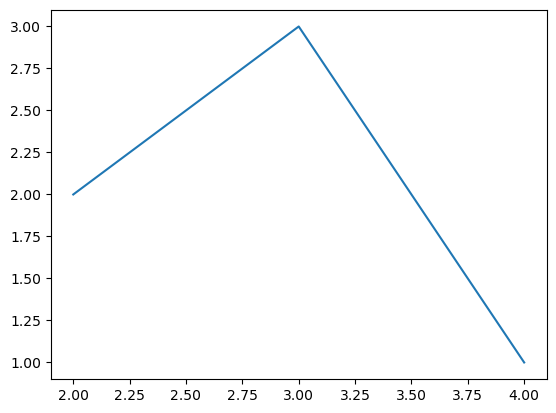

In [4]:
plt.plot([1,2,3,4],[None,2,3,1])

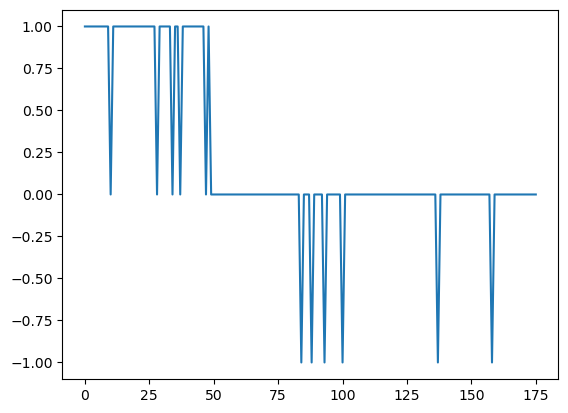

In [16]:
#noin residuella 30 on todennakoisesti jotain vika
# ehka siella ei ole perassa 2 residuea ja se jostain syysta aiheuttaa ongelmia
plt.plot(list(range(len(kk))),kk)

In [50]:
residues=[]
shifts=[]
for   shift,idn in zip(experiments[ID]["shifts"]["N"],experiments[ID]["shifts"]["atomID_shift"]):
    if shift!="Nan":
        residues.append(idn)
        shifts.append(shift)

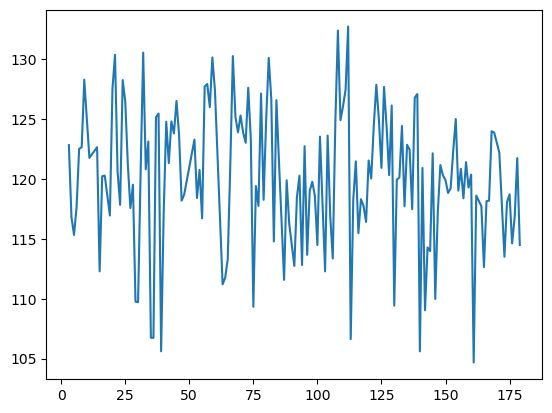

In [51]:
plt.plot(residues,shifts)

In [15]:
kk=[]
for i in range(len(apu)-1):
    kk.append(apu[i+1]-int(experiments["4267"]["shifts"]["atomID_shift"][i]))

In [32]:
print(len(experiments["4267"]["shifts"]["AA_shift"]))
print(len(experiments["4267"]["shifts"]["atomID_shift"]))
print(len(experiments["4267"]["shifts"]["H"]))
print(len(experiments["4267"]["shifts"]["HA"]))
print(len(experiments["4267"]["shifts"]["CA"]))
print(len(experiments["4267"]["shifts"]["C"]))
print(len(experiments["4267"]["shifts"]["CB"]))
print(len(experiments["4267"]["shifts"]["N"]))

2191
2191
2191
2191
2191
2191
2191
2191


In [14]:
experiments={}
for root, dirs, files in os.walk(BMBR_path):
    if len(files)==1:
        file=root+"/"+files[0]
        
if 1==1:
    if 1==1:
        file="load_data_does_not_work.test"
        with open(file,"r") as f:
            read_relaxations=False
            read_shifts=False
            counter_relaxations=0
            counter_shifts=0
            HN=False
            Ha=False
            C=False
            Ca=False
            Cb=False
            N=False

            experiments["shifts"]={}
            experiments["shifts"]["AA_shift"]=[]
            experiments["shifts"]["atomID_shift"]=[]
            shifts=["H","HA","C","CA","CB","N"]
            for shift in shifts:
                experiments["shifts"][shift]=[]
            
            for idline,line in enumerate(f):
                counter_relaxations+=1
                counter_shifts+=1


                
                if "_Atom_chem_shift.Assigned_chem_shift_list_ID" in line:
                    counter_shifts=-3
                if counter_shifts==-1:
                    read_shifts=True
                if read_shifts:
                    shiftsP=[HN,Ha,C,Ca,Cb,N]
                    if len(line.split())==24:
                        if len(experiments["shifts"]["atomID_shift"])>0:
                            if line.split()[5]==experiments["shifts"]["atomID_shift"][-1]:
                                for index,shift in enumerate(shifts):
                                    if shift==line.split()[7]:
                                        experiments["shifts"][shift].append(line.split()[10])
                                        shiftsP[index]=True
                                        if shift=="HA":
                                            print(line.split()[5])
                                #print(line.split()[5], shiftsP)
                            else:
                                print("New line starts here:",shiftsP)
                                experiments["shifts"]["atomID_shift"].append(line.split()[5])
                                experiments["shifts"]["AA_shift"].append(line.split()[6])
                                for index,shift in enumerate(shifts):
                                    if len(experiments["shifts"][shift])<len(experiments["shifts"]["atomID_shift"])-1:
                                        experiments["shifts"][shifts[index]].append("Nan")
                                   
                                    if shift==line.split()[7]:
                                        experiments["shifts"][shift].append(line.split()[10])
                                        shiftsP[index]=True
                                    
                                    shiftsP[index]=False
                            print(idline,line.split()[5],line.split()[7],experiments["shifts"]["H"])
                                
                        else:
                            experiments["shifts"]["atomID_shift"].append(line.split()[5])
                            experiments["shifts"]["AA_shift"].append(line.split()[6])
                            for index,shif in enumerate(shiftsP):
                                if not shif:
                                    experiments["shifts"][shifts[index]].append("Nan")
                                shiftsP[index]=False
                            
                        
                
               

3 1 HE2 ['Nan']
4 1 HE3 ['Nan']
5 1 CE ['Nan']
New line starts here: [False, False, False, False, False, False]
6 2 HA ['Nan']
7 2 HB2 ['Nan']
8 2 HB3 ['Nan']
9 2 HG2 ['Nan']
10 2 HG3 ['Nan']
11 2 C ['Nan']
12 2 CA ['Nan']
13 2 CB ['Nan']
New line starts here: [False, False, False, False, False, False]
14 3 H ['Nan', 'Nan', '8.58']
3
15 3 HA ['Nan', 'Nan', '8.58']
16 3 HB2 ['Nan', 'Nan', '8.58']
17 3 HB3 ['Nan', 'Nan', '8.58']
18 3 C ['Nan', 'Nan', '8.58']
19 3 CA ['Nan', 'Nan', '8.58']
20 3 CB ['Nan', 'Nan', '8.58']
21 3 N ['Nan', 'Nan', '8.58']
New line starts here: [False, False, False, False, False, False]
22 4 H ['Nan', 'Nan', '8.58', '8.51']
4
23 4 HA ['Nan', 'Nan', '8.58', '8.51']
24 4 HB2 ['Nan', 'Nan', '8.58', '8.51']
25 4 HB3 ['Nan', 'Nan', '8.58', '8.51']
26 4 C ['Nan', 'Nan', '8.58', '8.51']
27 4 CA ['Nan', 'Nan', '8.58', '8.51']
28 4 CB ['Nan', 'Nan', '8.58', '8.51']
29 4 N ['Nan', 'Nan', '8.58', '8.51']
New line starts here: [False, False, False, False, False, False]
30 5